<a href="https://colab.research.google.com/github/hunorxilard/onkutfel_2020-21/blob/szili_dolga/nagy_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#download section
!wget https://github.com/hunorxilard/onkutfel_2020-21/blob/main/big_opt.h5?raw=True
!wget https://github.com/hunorxilard/onkutfel_2020-21/blob/main/half_test.zip?raw=True
!unzip ./half_test.zip?raw=True

In [2]:
#import basic stuff
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from google.colab.patches import cv2_imshow

In [3]:
#import tensorflow stuff
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing import image

In [97]:
#load model
model = tf.keras.models.load_model('big_opt.h5?raw=True')

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 64)      640       
_________________________________________________________________
activation_11 (Activation)   (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 350464)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 350465    
_________________________________________________________________
activation_12 (Activation)   (None, 1)                 0         
Total params: 351,105
Trainable params: 351,105
Non-trainable params: 0
________________________________________________

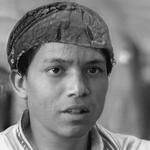

In [131]:
#show image
ORIGINAL = '/content/half_test/fake/51DIRTLTE7.jpg'
DIM = 150

img = image.load_img(ORIGINAL, target_size=(DIM, DIM))

cv2_imshow(cv2.imread(ORIGINAL, cv2.IMREAD_GRAYSCALE))

In [132]:
#preprocess input
def create_preprocessed_data(img):
  training_data = []
  img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
  training_data.append([img_array,0])
  X=[]
  y=[]
  for features, label in training_data:
    X.append(features)
    y.append(label)
  X=np.array(X).reshape(-1,150,150,1)
  return X

x = create_preprocessed_data(ORIGINAL)

In [133]:
#predict
prediction = model.predict(x)
print(prediction[0][0])

1.0


In [112]:
#Grad-CAM process
with tf.GradientTape() as tape:
  last_conv_layer = model.get_layer('conv2d_7')
  iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

In [113]:
print(heatmap)

tf.Tensor(
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]], shape=(1, 148, 148), dtype=float32)


In [114]:
#visualize heatmap
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((34, 34))
plt.matshow(heatmap)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: ignored

In [94]:
#cover
img = cv2.imread(ORIGINAL)

INTENSITY = 0.5
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

img = heatmap * INTENSITY + img

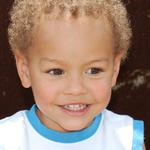

AttributeError: ignored

In [122]:
cv2_imshow(cv2.imread(ORIGINAL))
cv2_imshow(img)

In [137]:
DATADIR = '/content/half_test/fake/'
p = 1.0
for img in os.listdir(DATADIR):
  x = create_preprocessed_data(ORIGINAL)
  prediction = model.predict(x)
  p = prediction[0][0]
  print(img,p)
  if p < 0.85:
    break


GMGZKXKO3J.jpg 1.0
HISZ5QFLNS.jpg 1.0
6BN7OFF5US.jpg 1.0
1R1LFA37UL.jpg 1.0
9OK5ANMSPB.jpg 1.0
1QTEOWQZEJ.jpg 1.0
6IOVYAA2F8.jpg 1.0
180ZCV93UI.jpg 1.0
7O2NCXUQI5.jpg 1.0
0M776S0CZQ.jpg 1.0
16X5KDZGBA.jpg 1.0
0UE540NPUW.jpg 1.0
6WAQKEGFDR.jpg 1.0
7QGUD8A2NP.jpg 1.0
4VFFI752JE.jpg 1.0
E5EI9WF4O1.jpg 1.0
E6Y5QHIW7Y.jpg 1.0
39K7RJRUNW.jpg 1.0
FTUW0XB6IE.jpg 1.0
CD939BUYJ5.jpg 1.0
5RN97REM6S.jpg 1.0
F72DZSRS5W.jpg 1.0
CVOK9CH8MN.jpg 1.0
C05C3P7G8K.jpg 1.0
4HWTO6M74T.jpg 1.0
GWUYPKRUIY.jpg 1.0
1OPHTMF2BS.jpg 1.0
F995K7Y7V3.jpg 1.0
747JPE8K40.jpg 1.0
G1NXDTPGAI.jpg 1.0
0LR8TCGH6G.jpg 1.0
GBFQ4K1SZG.jpg 1.0
GLYPEMYO11.jpg 1.0
5UVKJ9BCDC.jpg 1.0
3423DC3IQQ.jpg 1.0
6FFQC90ETC.jpg 1.0
0NCTNUBL8I.jpg 1.0
6GON59JAI7.jpg 1.0
93B7O4ELL8.jpg 1.0
AVFHLS3845.jpg 1.0
1GF313AFY7.jpg 1.0
69O8DV7P1R.jpg 1.0
8H5QKV25RA.jpg 1.0
27BU567G3Y.jpg 1.0
92LBMDAU0Q.jpg 1.0
3CKBZB7T3H.jpg 1.0
HH839RF7LC.jpg 1.0
08M30FPP4Q.jpg 1.0
4E8AKH5XWK.jpg 1.0
11P5B759DK.jpg 1.0
DMDUJMNI4S.jpg 1.0
71YWVNRC1M.jpg 1.0
B149E3Y6C6.j